# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

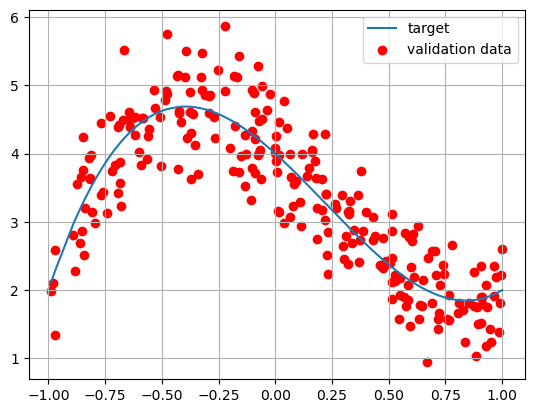

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

from keras.optimizers import SGD, Adam
from keras.activations import relu, sigmoid
from keras.losses import mean_absolute_error, mean_squared_error
#
N_train = 2500
N_epoch = 50
N_batch = 32
sigma = 0.5   # noise 
act = 'tanh' # best activation function , relu  bad, sigmoid poco peggio di tanh
opt = 'sgd'  # best opt, adam shiftato
lossf = 'mse' # best loss function, meglio di poco rispetto a mae

neuron = 4 #number of neurons per layer better

# generate training inputs
np.random.seed(0)

# Polynomial function
def pol(x):
    return 4 - 3*x - 2*x**2 + 3*x**3
    
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, int(N_train*0.1))
x_valid.sort()
y_target = pol(x_valid) # ideal (target) linear function

y_train = np.random.normal(pol(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(pol(x_valid), sigma)

# plot validation and target dataset

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

# compose the NN model
layers = 8
model = tf.keras.Sequential()

model.add(Dense(1, input_shape=(1,)))

model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))
#model.add(Dense(neuron, activation=act))

model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer= opt, loss=lossf, metrics=['mse'])

In [14]:
# get a summary of our composed model
model.summary()


# report training progress against validation data

history = model.fit(x=x_train, y=y_train, 
          batch_size=N_batch, epochs=N_epoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
# return weights and biases
model.get_weights()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=N_batch, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=N_batch, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7872 - mse: 4.7872 - val_loss: 1.0808 - val_mse: 1.0808
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 1.0288 - mse: 1.0288 - val_loss: 0.6846 - val_mse: 0.6846
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.6605 - mse: 0.6605 - val_loss: 0.5063 - val_mse: 0.5063
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.5236 - mse: 0.5236 - val_loss: 0.4302 - val_mse: 0.4302
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.4845 - mse: 0.4845 - val_loss: 0.3921 - val_mse: 0.3921
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.4297 - mse: 0.4297 - val_loss: 0.3595 - val_mse: 0.3595
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.3862 - mse: 0.3862 - val_loss: 0.3409 - val_mse: 0.3409
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.3531 - mse: 0.3531 - val_loss: 0.3223 - val_mse: 0.3223
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss

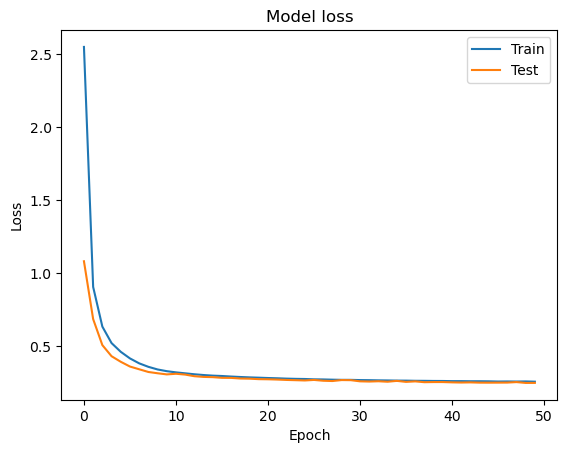

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


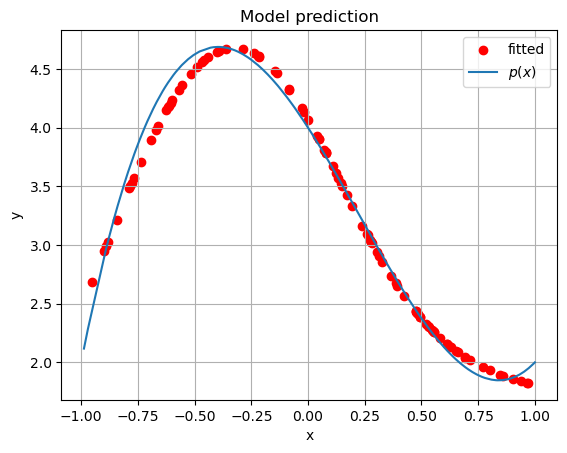

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# save results 
import pandas as pd

epochs = range(1, len(history.history['loss']) + 1)
data = {
    'epoch': epochs,
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}
pf = pd.DataFrame(data)  
#pf.to_csv(f'poli/Neuron/loss{neuron}.dat', index=False, header=False, sep=' ')
#pf.to_csv(f'poli/Layers/loss{layers}.dat', index=False, header=False, sep=' ')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#############################################################

x_predicted = np.random.uniform(-1.0, 1.0, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='fitted')
plt.plot(x_valid, y_target, label='$p(x)$')
plt.title(r'Model prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Ensure x_predicted and y_predicted are 1-dimensional
x_predicted = np.ravel(x_predicted)
y_predicted = np.ravel(y_predicted)

# save data in a file
pf = pd.DataFrame({'x': x_predicted,'y':y_predicted})
#pf.to_csv(f'poli/Neuron/Neuron_{neuron}.dat', index=False, header=False, sep=' ')
#pf.to_csv(f'poli/Layers/layers_{layers}.dat', index=False, header=False, sep=' ')

## Number of neurons per layer

- **N_train**: 2500  
- **N_epoch**: 50  
- **N_batch**: 32  
- **σ**: 0.5 (noise)  

### Key Observations

- **Activation Function**:  
  - Best: `tanh`  
  - Alternatives:  
    - `relu` (bad performance)  
    - `sigmoid` (slightly worse than `tanh`)  

- **Optimizer**:  
  - Best: `sgd`  
  - Alternative: `adam` (shifted behavior)  

- **Loss Function**:  
  - Best: `mse`  
  - Alternative: `mae` (slightly worse than `mse`)  

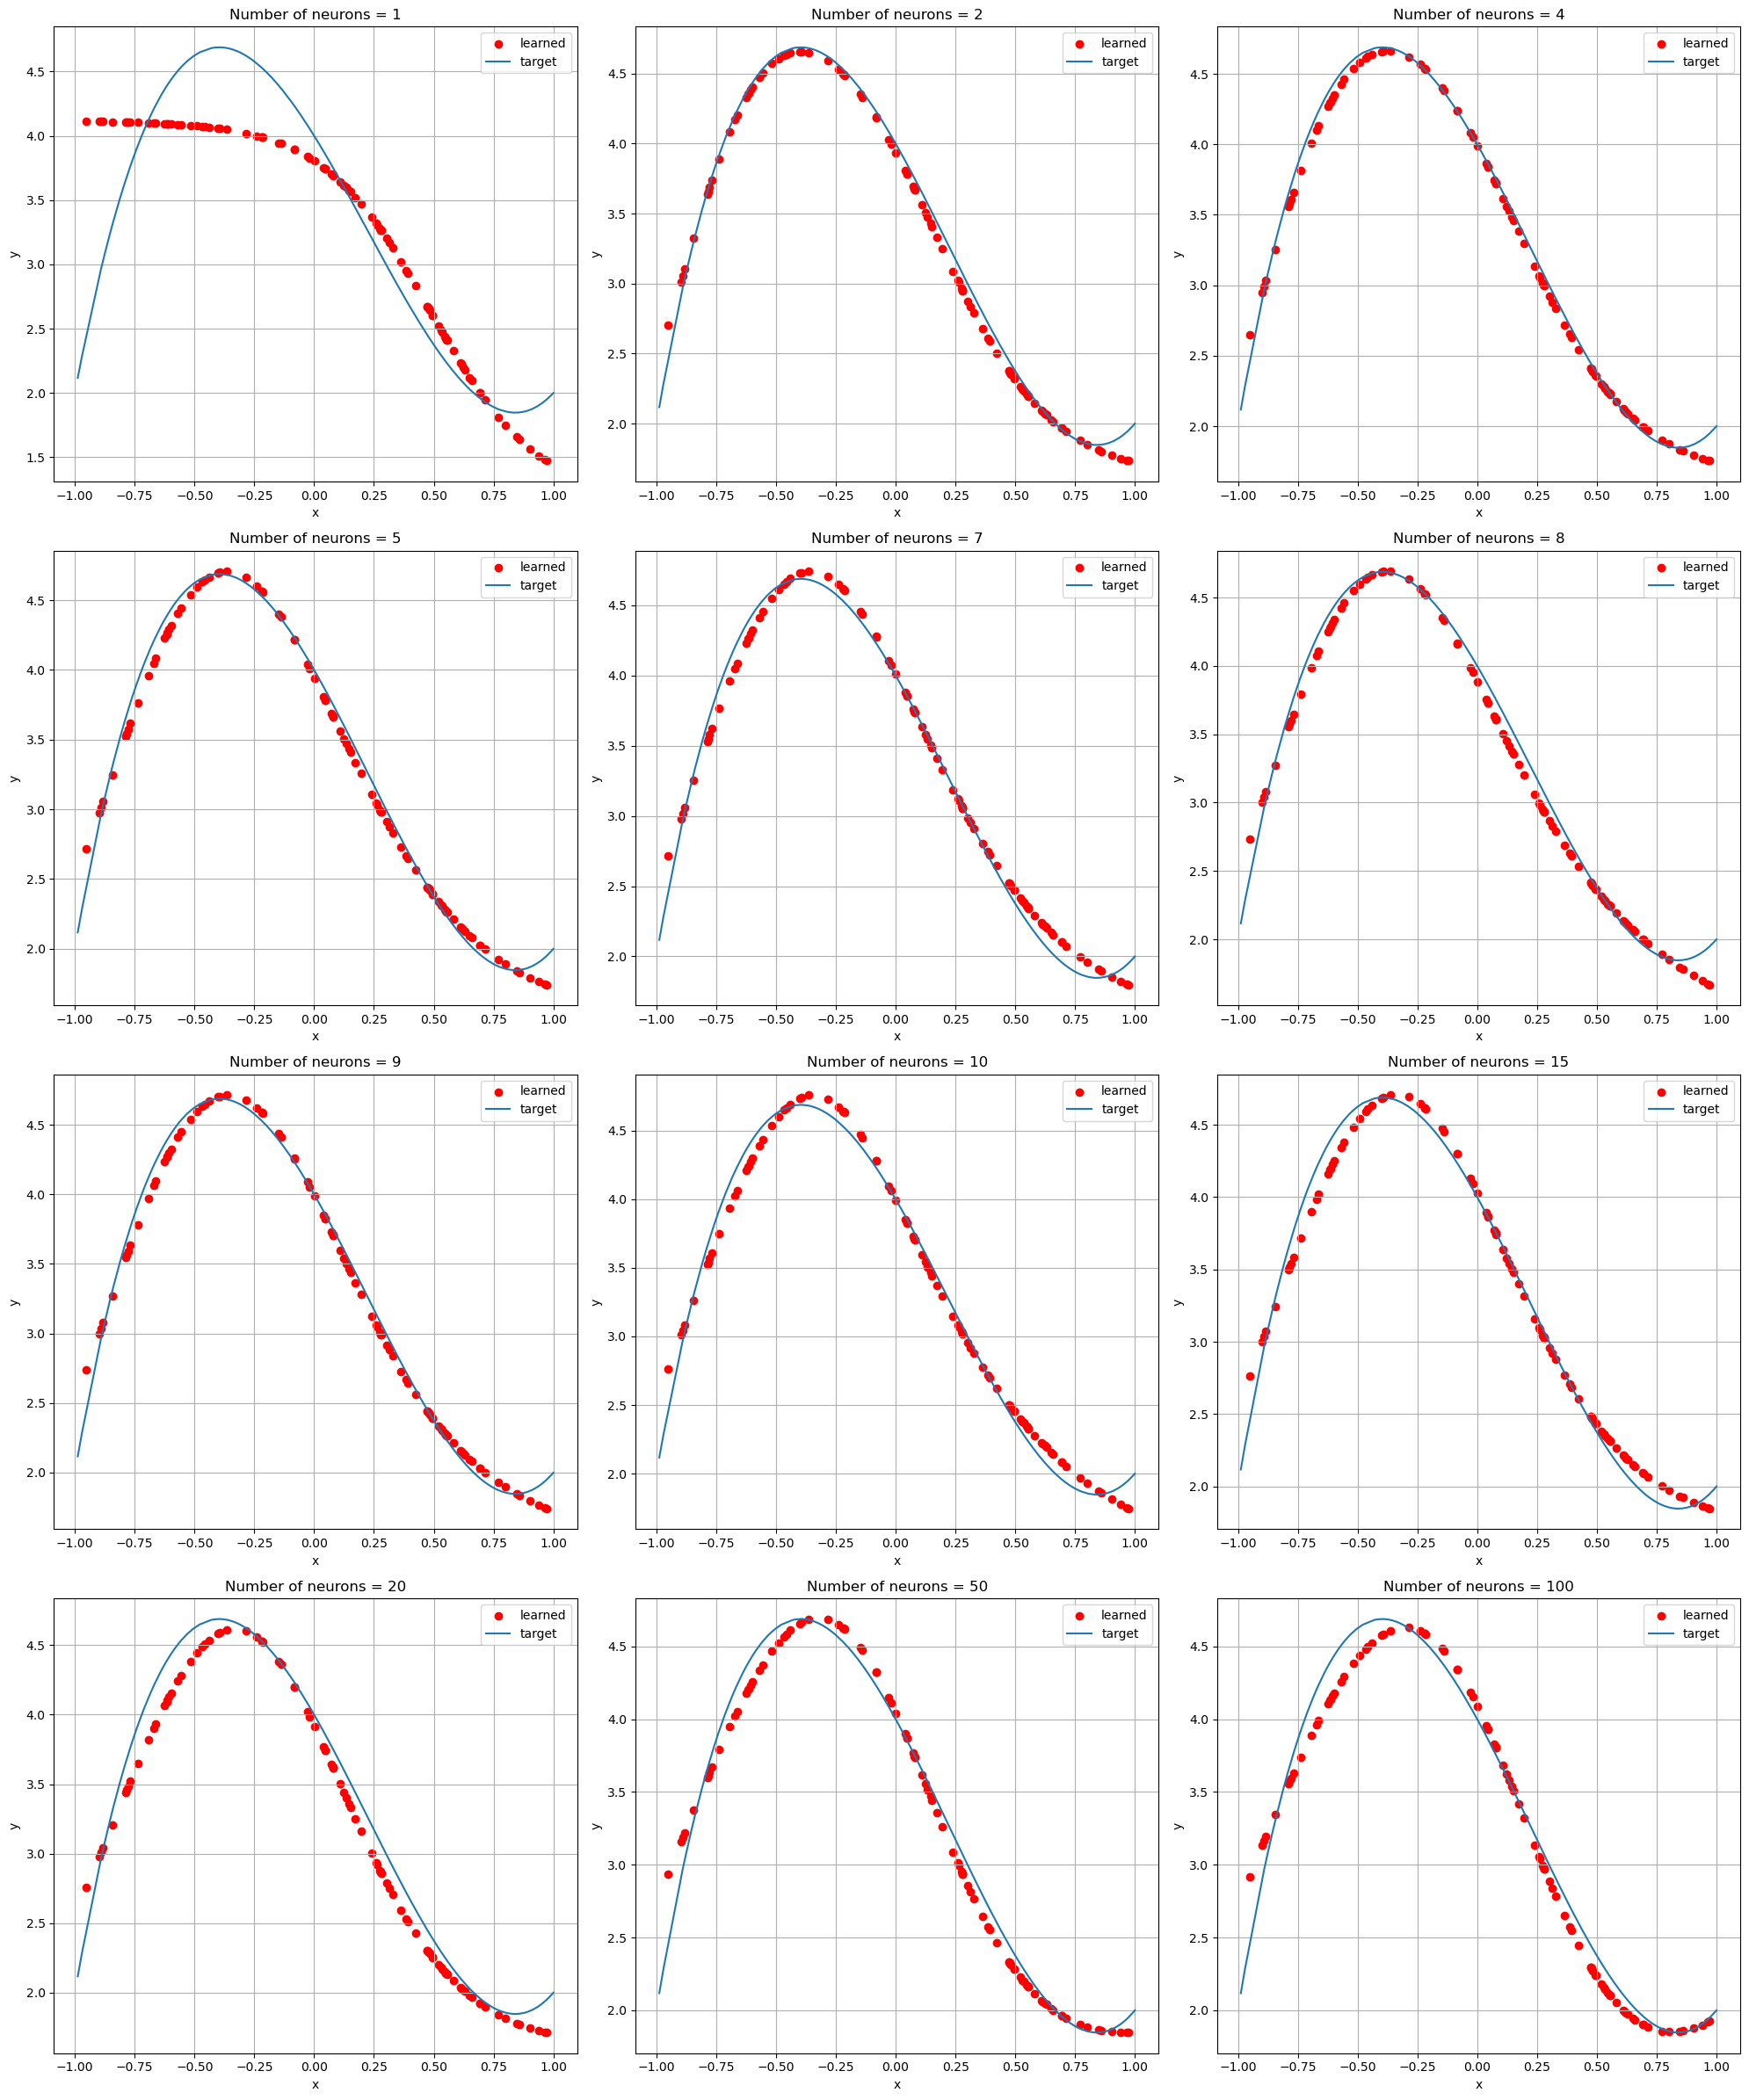

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of neurons
Neurons = [1, 2, 4, 5, 7, 8, 9, 10, 15, 20, 50, 100]

# Create subplots with 3 columns and enough rows
rows = (len(Neurons) + 2) // 3  # Calculate the number of rows needed
fig, axs = plt.subplots(rows, 3, figsize=(20, rows * 6))  # Adjust the height dynamically

# Flatten the axs array for easier iteration
axs = axs.flatten()

for i, s in enumerate(Neurons):
    # Load data for each number of neurons
    x_predicted, y_predicted = np.loadtxt(f'poli/Neuron/Neuron_{s}.dat', delimiter=' ', unpack=True)
    
    # Plot learned predictions
    axs[i].scatter(x_predicted, y_predicted, color='r', label='learned')
    
    # Plot the target function
    axs[i].plot(x_valid, y_target, label='target')
    
    # Label axes and add legend, grid, and title
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_title(f'Number of neurons = {s}')

# Hide unused subplots
for j in range(len(Neurons), len(axs)):
    axs[j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


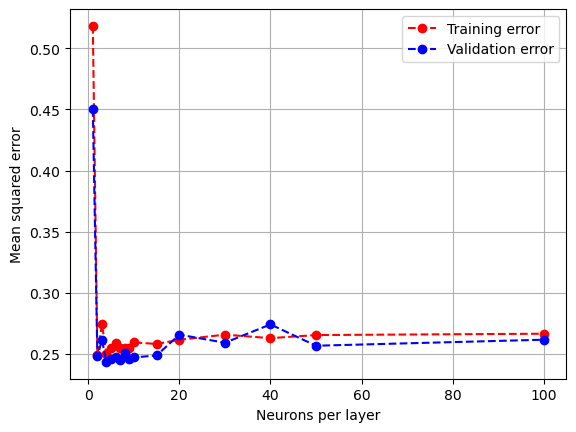

In [54]:
# Liste per memorizzare i valori finali degli errori di training e validazione
loss_t = []  # Lista per l'errore di training
loss_v = []  # Lista per l'errore di validazione
Neurons = [1, 2,3, 4, 5,6, 7, 8, 9, 10, 15, 20,30, 40, 50, 100]
for i, n in enumerate(Neurons):
    # Carica i dati dal file corrispondente al layer `n`
    # Il file contiene valori separati da spazi per x, errore di training e errore di validazione
    x, loss_train, loss_valid = np.loadtxt(f'poli/Neuron/loss{n}.dat', delimiter=' ', unpack=True)
    
    # Appendi l'ultimo valore degli errori di training e validazione alle rispettive liste
    loss_t.append(loss_train[-1])
    loss_v.append(loss_valid[-1])

# Creazione del grafico
# Grafico dell'errore di training rispetto al numero di neuroni per layer
plt.plot(Neurons, loss_t, label='Training error', marker='o', linestyle='--', color='red')

# Grafico dell'errore di validazione rispetto al numero di neuroni per layer
plt.plot(Neurons, loss_v, label='Validation error', marker='o', linestyle='--', color='blue')

# Etichetta per l'asse x
plt.xlabel('Neurons per layer')

# Etichetta per l'asse y
plt.ylabel('Mean squared error')

# Aggiunta della legenda per distinguere le curve
plt.legend()

# Aggiunta della griglia al grafico
plt.grid(True)

# Mostra il grafico risultante
plt.show()


## Number of layer

- **Number of neurons fixed**: 4

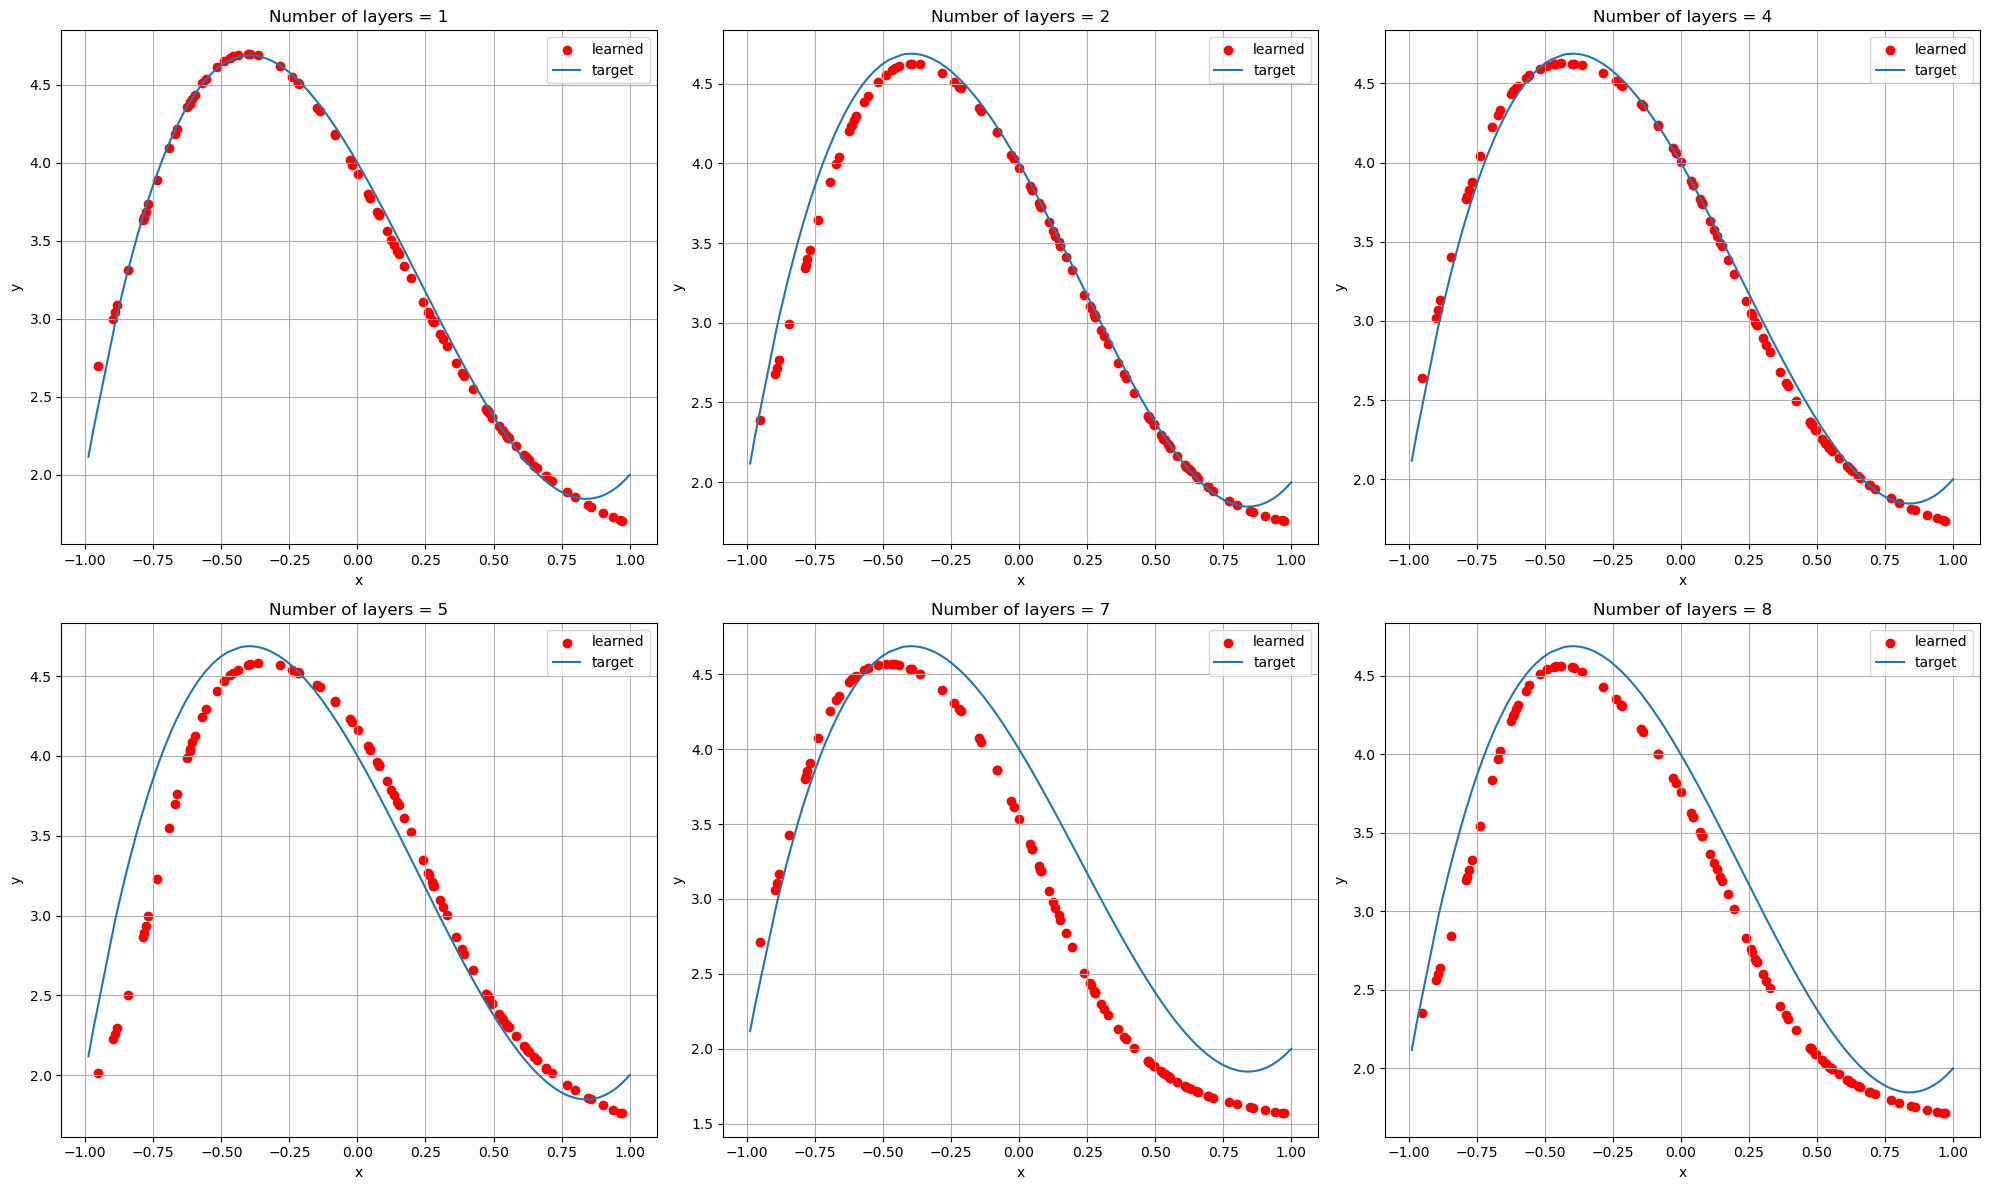

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of neurons
Layers = [1, 2, 4, 5, 7, 8]

# Create subplots with 3 columns and enough rows
rows = (len(Leyers) + 2) // 3  # Calculate the number of rows needed
fig, axs = plt.subplots(rows, 3, figsize=(20, rows * 6))  # Adjust the height dynamically

# Flatten the axs array for easier iteration
axs = axs.flatten()

for i, s in enumerate(Layers):
    # Load data for each number of neurons
    x_predicted, y_predicted = np.loadtxt(f'poli/Layers/layers_{s}.dat', delimiter=' ', unpack=True)
    
    # Plot learned predictions
    axs[i].scatter(x_predicted, y_predicted, color='r', label='learned')
    
    # Plot the target function
    axs[i].plot(x_valid, y_target, label='target')
    
    # Label axes and add legend, grid, and title
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_title(f'Number of layers = {s}')

# Hide unused subplots
for j in range(len(Layers), len(axs)):
    axs[j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


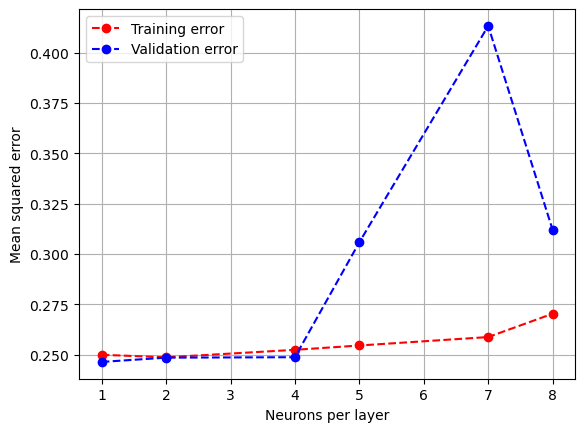

In [56]:
# Liste per memorizzare i valori finali degli errori di training e validazione
loss_t = []  # Lista per l'errore di training
loss_v = []  # Lista per l'errore di validazione
# Ciclo sui diversi layer
for i, n in enumerate(Layers):
    # Carica i dati dal file corrispondente al layer `n`
    # Il file contiene valori separati da spazi per x, errore di training e errore di validazione
    x, loss_train, loss_valid = np.loadtxt(f'poli/Layers/loss{n}.dat', delimiter=' ', unpack=True)
    
    # Appendi l'ultimo valore degli errori di training e validazione alle rispettive liste
    loss_t.append(loss_train[-1])
    loss_v.append(loss_valid[-1])

# Creazione del grafico
# Grafico dell'errore di training rispetto al numero di neuroni per layer
plt.plot(Layers, loss_t, label='Training error', marker='o', linestyle='--', color='red')

# Grafico dell'errore di validazione rispetto al numero di neuroni per layer
plt.plot(Layers, loss_v, label='Validation error', marker='o', linestyle='--', color='blue')

# Etichetta per l'asse x
plt.xlabel('Neurons per layer')

# Etichetta per l'asse y
plt.ylabel('Mean squared error')

# Aggiunta della legenda per distinguere le curve
plt.legend()

# Aggiunta della griglia al grafico
plt.grid(True)

# Mostra il grafico risultante
plt.show()
